In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Symmetry and Indicators ##


When the random variables that are being added are not independent, finding the variance of the sum does involve finding covariances. As before, let $X_1, X_2, \ldots X_n$ be random variables with sum

$$
S_n = \sum_{i=1}^n X_i
$$

The variance of the sum is

$$
Var(S_n) ~ = ~ \sum_{i=1}^n Var(X_i) + \mathop{\sum \sum}_{1 \le i \ne j \le n} Cov(X_i, X_j)
$$

There are $n$ variance terms in the first sum on the right hand side, and $n(n-1)$ covariance terms. That's a lot of variances and covariances to calculate. Finding the variance of a sum of dependent random variables can require effort. 

But ***if there is symmetry in the joint distribution of $X_1, X_2, \ldots, X_n$***, that is, if all the variances are equal and all the covariances are equal, then

$$
Var(S_n) ~ = ~ nVar(X_1) + n(n-1)Cov(X_1, X_2)
$$

That looks much simpler. In the examples below we will see a couple of different ways of using this simple form when we have symmetry.

Before we apply the formula, let's start out by finding the covariance of two indicators. We will need this when we find the variance of a sum of indicators.

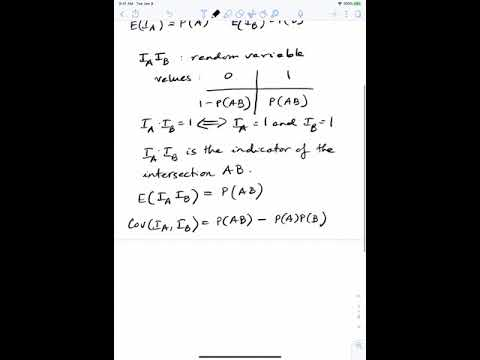

In [2]:
# VIDEO: Covariance of Two Indicators 
from IPython.display import YouTubeVideo

YouTubeVideo('9j8VwhEsWrk')

### Indicators ###
Let $A$ and $B$ be two events. Let $I_A$ be the indicator of $A$ and let $I_B$ be the indicator of  $B$. This is going to be one of the rare instances where we use an expected product to find a covariance. That's because we know that products of indicators are themselves indicators.

$$
Cov(I_A, I_B) = E(I_AI_B) - E(I_A)E(I_B) = P(AB) - P(A)P(B)
$$

You can see that the covariance is 0 if $A$ and $B$ are independent, consistent with the more general result earlier in this chapter. 

When $A$ and $B$ are not independent, covariance helps us understand the nature of the dependence. For example, if $Cov(I_A, I_B)$ is positive, then

$$
P(AB) > P(A)P(B) ~~~ \implies ~~~ P(A)P(B \mid A) > P(A)P(B)
~~~ \implies ~~~ P(B \mid A) > P(B)
$$

Given that $A$ has occurred, the chance of $B$ is higher than it is overall. This is called *positive association* or *positive dependence* of $A$ and $B$.

```{admonition} Quick Check
One draw is made at random from the integers $1$ through $10$. Find the covariance of the indicators $I_A$ and $I_B$ defined as follows.

$I_A$ is the indicator of the event that the number drawn is greater than $6$.

$I_B$ is the indicator of the event that the number drawn is a multiple of $5$.

```

```{admonition} Answer
:class: dropdown
$1/50$

```

### Example: Number of Classes ###

Suppose you draw $n$ times at random from a population that is evenly split between several classes. For example, this could be a model for the birth months of $n$ people if each person is equally likely to be born in any of the 12 months of the year independent of the births of all others. You can model this as drawing $n$ times at random with replacement from the 12 months.

Suppose we want to find the expectation and variance of the number of classes that appear in the sample, that is, the number of months that appear.

Let $X$ be the number of months that appear in the sample. You will have noticed by now that it is often easier to deal with the months that don't appear. So let $Y$ be the number of months that don't appear. Then $X = 12-Y$, and so $E(X) = 12 - E(Y)$ and $Var(X) = Var(Y)$.

To find $E(Y)$, write $Y$ as a sum of indicators: $Y = I_1 + I_2 + \cdots + I_{12}$ where $I_j$ is the indicator of the event that Month $j$ doesn't appear.

Now $E(I_j) = P(\text{month } j \text{ doesn't appear}) = \big{(} \frac{11}{12} \big{)}^n$ is the same for all $j$. By the additivity of expectation, 

$$
E(Y) ~ = ~ 12E(I_1) ~ = ~ 12\big{(} \frac{11}{12} \big{)}^n
$$

So $E(X) = 12 - 12\big{(} \frac{11}{12} \big{)}^n$.

Since $I_j$ is an indicator, $Var(I_j) = \big{(} \frac{11}{12} \big{)}^n\big{(}1 - \big{(} \frac{11}{12} \big{)}^n\big{)}$ for all $j$. 

By the formula for the covariance of two indicators, for $i \ne j$

$$
\begin{align*}
Cov(I_i, I_j) ~ &= ~ P(\text{months } i \text{ and } j \text{ don't appear}) - \big{(} \frac{11}{12} \big{)}^n\big{(} \frac{11}{12} \big{)}^n \\
&= ~ \big{(} \frac{10}{12} \big{)}^n - \big{(} \frac{11}{12} \big{)}^n\big{(} \frac{11}{12} \big{)}^n
\end{align*}
$$

Put all this together to get

$$
\begin{align*}
Var(X) ~ = ~ Var(Y) ~ &= 12Var(I_1) + 12 \cdot 11 \cdot Cov(I_1, I_2) \\
&= ~ 12\big{(} \frac{11}{12} \big{)}^n\big{(}1 - \big{(} \frac{11}{12} \big{)}^n\big{)} ~ + ~
12 \cdot 11 \cdot \Big{(} \big{(} \frac{10}{12} \big{)}^n - \big{(} \frac{11}{12} \big{)}^n\big{(} \frac{11}{12} \big{)}^n \Big{)}
\end{align*}
$$

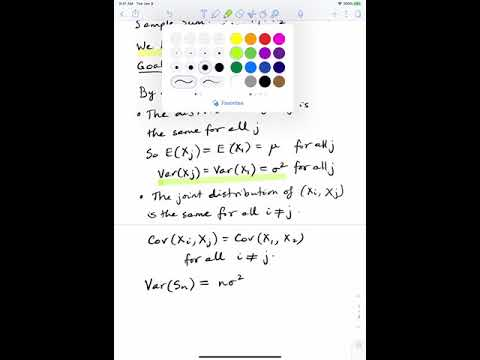

In [3]:
# VIDEO: Variance of a Simple Random Sample Sum
YouTubeVideo('XWHrPZOgD0A')

### Variance of a Simple Random Sample Sum ###
Suppose we have a numerical population of size $N$, and let the population have mean $\mu$ and standard deviation $\sigma$. Draw a simple random sample of size $n$ from the population. For $j$ in the range 1 through $n$, let $X_j$ be the $j$th value drawn.

Let $S_n = X_1 + X_2 + \cdots + X_n$. Then by the symmetry of the joint distribution of $X_1, X_2, \cdots, X_n$ we know that $E(S_n) = n\mu$. 

Also by symmetry,

$$
Var(S_n) ~ = ~ nVar(X_1) + n(n-1)Cov(X_1, X_2) ~ = ~ n\sigma^2 + n(n-1)Cov(X_1, X_2)
$$

How can we find $Cov(X_1, X_2)$? It's not a good idea to try and multiply the two variables, as they are dependent and their distributions might be unpleasant. The expected product will be hard to find.

Instead, we will ***solve for the covariance by using the equation above in a special case where we already know the variance on the left hand side.***

The equation above for $Var(S_n)$ is valid for any sample size $n$. In particular, it is valid in the case when we take a census, that is, when we sample all the elements of the population. In that case $n = N$ and the equation is

$$
Var(S_N) = N\sigma^2 + N(N-1)Cov(X_1, X_2)
$$

Why is helpful? To answer this, think about the variability in $S_N$. We have sampled the entire population without replacement. Therefore $S_N$ is just the total of the entire population. There is no sampling variability in $S_N$, because there is only one possible sample of size $N$.

That means $Var(S_N) = 0$. We can use this to solve for $Cov(X_1, X_2)$.

$$
0 = N\sigma^2 + N(N-1)Cov(X_1, X_2) ~~~~~ \implies ~~~~~
Cov(X_1, X_2) = -\frac{\sigma^2}{N-1}
$$

Now plug this into the formula for $Var(S_n)$ for any smaller sample size $n$.

$$
Var(S_n) ~ = ~ n\sigma^2 - n(n-1)\frac{\sigma^2}{N-1} ~ = ~
n\sigma^2 \Big{(} 1 - \frac{n-1}{N-1} \Big{)} ~ = ~
n\sigma^2 \frac{N-n}{N-1}
$$

Recall that when the sample is drawn with replacement, the variance of the sample sum is $n\sigma^2$. When the sample is drawn without replacement, the formula is the same apart from the factor of $\frac{N-n}{N-1}$. In the next section we will examine this factor.

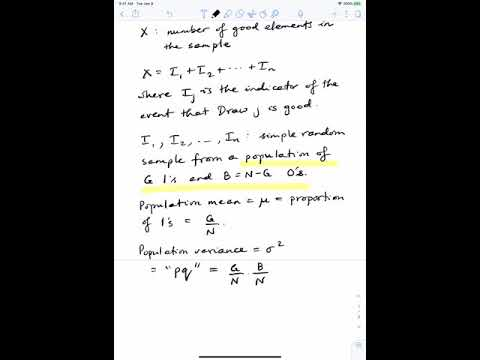

In [4]:
# VIDEO: Variance of the Hypergeometric
YouTubeVideo('SJ2X0h2XdiY')

### Example: Variance of the Hypergeometric ###

A important special case is when the numbers in the population are either $0$ or $1$. This models the situation in which some of the elements in the population are "good" and we are counting the number of good elements in a simple random sample. 

If the population consists of $N$ elements of which $G$ are labeled $1$, then 

- the population mean $\mu = \frac{G}{N}$, and 
- the population variance $\sigma^2 = \frac{G}{N}\cdot\frac{B}{N}$ where $B = N-G$ is the number of "bad" elements in the population.

Let $X$ be the number of good elements in simple random sample of $n$ elements drawn from the population. Remember that simple random samples are drawn without replacement, and that $X$ has the hypergeometric $(N, G, n)$ distribution.

Let $I_j$ be the indicator that Draw $j$ yields a good element. Then $X = \sum_{j=1}^n I_j$ is the sum of a simple random sample drawn from the population of $0$s and $1$s. By plugging into the formulas derived above,

$$
E(X) ~ = ~ n\frac{G}{N} ~~~~~ Var(X) ~ = ~ n \frac{G}{N} \cdot \frac{B}{N} \cdot \Big{(} \frac{N-n}{N-1} \Big{)}
$$

These formulas for the hypergeometric expectation and variace are almost the same as for the binomial when the sampling was done *with* replacement. The only difference is in the variance formula, where instead of just $npq$ we have another factor of $\frac{N-n}{N-1}$.

As an exercise, you should write $X$ as a sum of indicators and then use the methods of the first example in this section to find $Var(X)$. Be warned that some algebra is required to get it into the compact form given above.

```{admonition} Quick Check
A standard deck has $52$ cards of which four are aces. Find the expectation and variance of the number of aces in a poker hand of five cards dealt at random without replacement.

```

```{admonition} Answer
:class: dropdown
Expectation $5\cdot\frac{4}{52}$, variance $5\cdot\frac{4}{52}\cdot\frac{48}{52}\cdot\frac{47}{51}$

```